# Unconstrained Matrix Factorization for Collaborative Filtering

In [1]:
# imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as preprocess

In [3]:
# Load the dataset
ratings_base = pd.read_csv('datafiles/ml-100k/ua.base', sep='\t', names=['user_id', 'movie_id', 'rating', 'unix_timestamp'])
ratings_test = pd.read_csv('datafiles/ml-100k/ua.test', sep='\t', names=['user_id', 'movie_id', 'rating', 'unix_timestamp'])
# test = pd.read_csv('test.csv')
ratings_base.head()

,user_id,movie_id,rating,unix_timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712


In [153]:
#Convert the dataset into a matrix of ratings
df_matrix = np.zeros((ratings_base['user_id'].max(), ratings_base['movie_id'].max())) # rows = num of users, cols = num of movies
for row in range(ratings_base.shape[0]):
    df_matrix[int(ratings_base.iloc[row]['user_id']) - 1][int(ratings_base.iloc[row]['movie_id']) - 1] = ratings_base.iloc[row]['rating']
df_matrix

array([[5., 3., 4., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.]])

In [156]:
# df_matrix.shape

# Data Manipulation

In [4]:
# Function to change the scale of 'ratings' [grouped on 'user_id' using DataFrame.groupby('user_id').transform(customFunction)]
def scaleRatingsPerUser(df):
    if df.name == 'rating':
        scaledRatings = preprocess.scale(df.values)
        return scaledRatings
    else:
        return df

In [6]:
# Centre and Scale the ratings - Mean: 0, Standard Dev: 1
# Thus, in the collaborative filtering, nulls can be easily shown as 0 (mean behavior)
ratings_base_temp = ratings_base.copy()
dfScaledRatings = ratings_base_temp.groupby('user_id').transform(scaleRatingsPerUser)
dfScaledRatings['user_id'] = ratings_base_temp['user_id']

/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [7]:
#Convert the dataset into a matrix of ratings
dfScaledRatings_matrix = np.zeros((dfScaledRatings['user_id'].max(), dfScaledRatings['movie_id'].max())) # rows = num of users, cols = num of movies
for row in range(dfScaledRatings.shape[0]):
    dfScaledRatings_matrix[int(dfScaledRatings.iloc[row]['user_id']) - 1][int(dfScaledRatings.iloc[row]['movie_id']) - 1] = dfScaledRatings.iloc[row]['rating']


In [9]:
# dfScaledRatings_matrix

# Setup for Learning

In [ ]:
# M = U.V, where U = n*k, T(V) = k*m
# where,
#     n = num of users
#     m = num of movies
#     k = num of latent factors, which can be tuned using cross validation

In [161]:
# MSE calculation function
# Calculate error only for the ratings that were given initially
def calcMSEMatrixFactorizationGradientDescent(YMinusYHat, unscaledMatrix = df_matrix):
    mse = 0.0
    for i in range(unscaledMatrix.shape[0]):
        for j in range(unscaledMatrix.shape[1]):
            if unscaledMatrix[i][j] != 0:
                mse += 1/float(2)*(YMinusYHat[i][j])**2
    return mse
                

In [169]:
def matrixFactorizationGradientDescent(Y, U, V, learningRate, iterations):
    
    # Store the MSE for all the iteration levels
    MSE_Iteration = {'iteration':[], 'MSE': []}
    
    for i in range(iterations):

        # Multiply U and V to get the prediction matrix YHat
        Vtranspose = V.transpose()
        YHat = np.dot(U, Vtranspose)
        # Error Matrix / Cost Function J
#         J = 1/float(2) * np.square(np.subtract(Y, YHat))
        J = calcMSEMatrixFactorizationGradientDescent(np.subtract(Y, YHat))
        
        # Store the error (frobenious norm) along with the Gradient Descent iteration
        MSE_Iteration['iteration'].append(i)
        MSE_Iteration['MSE'].append(J)
        
        
        # Gradient Descent
        # J = 1/2 * ((Y - U.Vtrans)^2)
        # δJ/δU = (Y - U.Vtrans) * V
        # δJ/δV = (Y - U.Vtrans) * U

        delJ_WRT_U = -np.dot(np.subtract(Y, YHat), V)
        delJ_WRT_V = -np.dot(np.subtract(Y, YHat).transpose(), U)

        # Update the Vectors U and V
        U = U - learningRate * delJ_WRT_U
        V = V - learningRate * delJ_WRT_V
    
    # Plot the error with respect to the iteration
    plt.plot(MSE_Iteration['iteration'], MSE_Iteration['MSE'])
    return MSE_Iteration

{'MSE': [124265.26140016463,
  82478.94656285159,
  67486.15125647525,
  60067.05359855177,
  55783.69892199193,
  53068.60312897061,
  51235.77211388301,
  49941.41068637633,
  48996.00750331968,
  48287.378440868844,
  47745.31117769476,
  47323.847774336195,
  46991.77726319361,
  46727.24233518405,
  46514.53507365181,
  46342.11701630096,
  46201.35353063558,
  46085.68037680975,
  45990.04019756983,
  45910.4923998331,
  45843.93725888153,
  45787.917005789895,
  45740.469895878115,
  45700.02144917353,
  45665.30224093885,
  45635.28497214139,
  45609.13575685919,
  45586.17604252535,
  45565.85258615586,
  45547.71360660662,
  45531.38972206545,
  45516.578630500655,
  45503.03274235589,
  45490.54915892671,
  45478.96152630443,
  45468.133397141755,
  45457.95281022044,
  45448.32785739895,
  45439.18305369845,
  45430.45636241105,
  45422.096755598905,
  45414.06221294033,
  45406.31807996367,
  45398.8357212557,
  45391.59141592287,
  45384.56545214123,
  45377.7413853529,
 

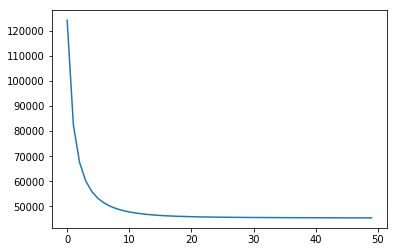

In [170]:
# Initialize variables
n = dfScaledRatings_matrix.shape[0]
m = dfScaledRatings_matrix.shape[1]
k = 5 # for starting out

# Initialize the decomposed matrices
np.random.seed(123)
U = np.random.rand(n,k)
V = np.random.rand(m,k)
# Rename Y
Y = dfScaledRatings_matrix

# Start the gradient descent routine
matrixFactorizationGradientDescent(Y, U, V, .0001, 10)

{'MSE': [124265.26140016463,
  93644.73863605128,
  75027.27159578055,
  63706.56842448362,
  56820.9591334754,
  52630.57466434459,
  50077.72604544106,
  48519.53511666915,
  47565.33233471165,
  46977.77462662908,
  46612.71702220062,
  46382.65295293029,
  46234.48745654094,
  46136.02614952916,
  46067.76378078043,
  46017.8948326936,
  45979.28280527617,
  45947.61997961057,
  45920.31059088232,
  45895.793466567724,
  45873.131539743285,
  45851.76335340742,
  45831.352833653786,
  45811.698630345636,
  45792.67953031117,
  45774.221687419005,
  45756.279026068,
  45738.82158208052,
  45721.82861295255,
  45705.28456345183,
  45689.176732538464,
  45673.49394753489,
  45658.22582952779,
  45643.36240170823,
  45628.89389339421,
  45614.81065299359,
  45601.10311945489,
  45587.76182322358,
  45574.77740046234,
  45562.140611713556,
  45549.84236043693,
  45537.87370931893,
  45526.22589354536,
  45514.89033094334,
  45503.858629235285,
  45493.122590783736,
  45482.67421523842,


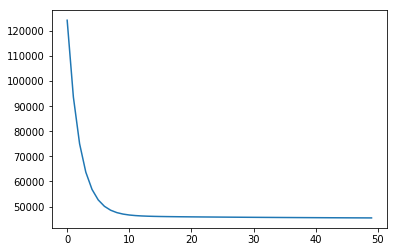

In [168]:
def matrixFactorizationGradientDescentALS(Y, U, V, learningRate, iterations):
    
    # Store the MSE for all the iteration levels
    MSE_Iteration = {'iteration':[], 'MSE': []}
    
    for i in range(iterations):

        # Multiply U and V to get the prediction matrix YHat
        Vtranspose = V.transpose()
        YHat = np.dot(U, Vtranspose)
        # Error Matrix / Cost Function J
#         J = 1/float(2) * np.square(np.subtract(Y, YHat))
        J = calcMSEMatrixFactorizationGradientDescent(np.subtract(Y, YHat))
        
        # Store the error (frobenious norm) along with the Gradient Descent iteration
        MSE_Iteration['iteration'].append(i)
        MSE_Iteration['MSE'].append(J)
        
        
        # Gradient Descent
        # J = 1/2 * ((Y - U.Vtrans)^2)
        # δJ/δU = (Y - U.Vtrans) * V
        # δJ/δV = (Y - U.Vtrans) * U

        if iterations % 2 == 0:            
            delJ_WRT_U = -np.dot(np.subtract(Y, YHat), V)
            U = U - learningRate * delJ_WRT_U
        else:
            delJ_WRT_V = -np.dot(np.subtract(Y, YHat).transpose(), U)
            V = V - learningRate * delJ_WRT_V

        # Update the Vectors U and V

        
    
    # Plot the error with respect to the iteration
    plt.plot(MSE_Iteration['iteration'], MSE_Iteration['MSE'])
    return MSE_Iteration
matrixFactorizationGradientDescentALS(Y, U, V, .0001, 50)

In [148]:
np.dot(U, V.transpose())[3]

array([0.79319463, 0.84575889, 0.9909476 , ..., 1.04647376, 1.44794526,
       0.67966969])

In [138]:
# plt.plot(range(20), np.dot(U, V.transpose())[0][:20])

In [137]:
# plt.plot(range(20), dfScaledRatings_matrix[0][:20])